**Furniture Price Prediction - Analisis faktor-faktor yang memengaruhi harga furnitur di platform e-commerce guna mendukung strategi harga yang lebih akurat dan kompetitif.**

**SUMBER DATASET:** https://www.kaggle.com/datasets/shawkyelgendy/furniture-price-prediction?resource=download

Dataset ini berisi informasi mengenai berbagai jenis furnitur yang dijual di Jumia.com. Data ini mencakup nama furnitur, kategori atau jenisnya, tautan ke halaman produk, rating pelanggan, opsi pengiriman, status penjualan, dan harga. dataset ini dapat digunakan untuk analisis eksplorasi, studi tren pasar, optimasi harga, serta pemodelan prediktif dalam memperkirakan harga furnitur berdasarkan fitur-fitur yang tersedia.

**LIBRARY**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Membaca Data**

In [9]:
df = pd.read_csv("/content/Furniture Price Prediction.csv")

df

,furniture,type,url,rate,delivery,sale,price
0,Bed side table with storage shelf,Home Decor Center,https://www.jumia.com.eg//ar/home-decor-center...,3.3,172.14,72%,2500.0
1,Bed side table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,54%,1200.0
2,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,18%,1099.0
3,Bedside table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,58%,1200.0
4,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,https://www.jumia.com.eg//ar/modern-home-wall-...,5.0,52.44,54%,1400.0
...,...,...,...,...,...,...,...
1995,Casio Standard Analogue Ladys Standard Analog ...,Casio Standard Analogue Ladys Standard Analog ...,https://www.jumia.com.eg//ar/casio-standard-an...,0.0,656.28,0%,1632.0
1996,Coffee table + side table,Hub Furniture,https://www.jumia.com.eg//ar/hub-furniture-ae-...,0.0,172.14,0%,11450.0
1997,Ben Togo Baby Bed,Bean GO,https://www.jumia.com.eg//ar/bean2go-newborn-b...,0.0,52.44,0%,550.0
1998,Cloud memory foam mattress (medical),CIREM,https://www.jumia.com.eg//ar/cirem-cloud-memor...,0.0,172.14,9%,8495.0


**Data Cleaning**

1. Missing values

In [6]:
print((df.isna().sum() / len(df)) * 100)

furniture    0.00
type         0.00
url          0.00
rate         0.00
delivery     0.00
sale         0.00
price        1.95
dtype: float64


Melakukan pengecekan nilai kosong pada kolom price

In [7]:
df[df['price'].isnull()]

,furniture,type,url,rate,delivery,sale,price
90,Diamora mattress height cm,Modern Home,https://www.jumia.com.eg//ar/generic-diamora-m...,3.4,172.14,25%,NaN
99,Beech wood bar stool,Modern Home,https://www.jumia.com.eg//ar/bar-wooden-chair-...,4.2,52.44,20%,NaN
100,Square bar chair beech wood lacquer,Modern Home,https://www.jumia.com.eg//ar/beech-square-bar-...,3.1,52.44,8%,NaN
142,Mora mattress guarantee ten years,Modern Home,https://www.jumia.com.eg//ar/generic-mora-matt...,0.0,172.14,30%,NaN
174,"Bed mattress, spring, separate, platinum, cm high",Family Bed,https://www.jumia.com.eg//ar/family-bed-platin...,0.0,172.14,0%,NaN
186,"Fantasia Hotel spring mattress, German design",Fantazzia,https://www.jumia.com.eg//ar/fantazzia-hotel-s...,0.0,172.14,0%,NaN
224,Beech wood bar stool,Modern Home,https://www.jumia.com.eg//ar/generic-bar-woode...,0.0,52.44,0%,NaN
251,"Supplied bed mattress, Super Belly Top, cm high",Family Bed,https://www.jumia.com.eg//ar/family-bed-super-...,0.0,172.14,0%,NaN
253,"A bed mattress with springs attached to a ""med...",Family Bed,https://www.jumia.com.eg//ar/family-bed-connec...,0.0,172.14,0%,NaN
256,"Fantasia Rebound compressed sponge mattress, G...",Fantazzia,https://www.jumia.com.eg//ar/fantazzia-rebound...,0.0,172.14,0%,NaN



Di sini kita akan melakukan imputasi pada kolom price dikarenakan data yang hilang pada kolom ini berada di angka 1.95%

In [10]:
df['price'].dropna().describe()

,price
count,1961.000000
mean,2910.418195
std,4002.917206
min,13.400000
25%,740.000000
50%,1900.000000
75%,4000.000000
max,55000.000000


Disini berdasarkan hasil analisis statistik, kita dapat menggunakan mean dari kolom price untuk imputasi nilai kosong tersebut

In [12]:
df['price'] = df['price'].fillna(df['price'].dropna().mean())

df

,furniture,type,url,rate,delivery,sale,price
0,Bed side table with storage shelf,Home Decor Center,https://www.jumia.com.eg//ar/home-decor-center...,3.3,172.14,72%,2500.0
1,Bed side table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,54%,1200.0
2,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,18%,1099.0
3,Bedside table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,58%,1200.0
4,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,https://www.jumia.com.eg//ar/modern-home-wall-...,5.0,52.44,54%,1400.0
...,...,...,...,...,...,...,...
1995,Casio Standard Analogue Ladys Standard Analog ...,Casio Standard Analogue Ladys Standard Analog ...,https://www.jumia.com.eg//ar/casio-standard-an...,0.0,656.28,0%,1632.0
1996,Coffee table + side table,Hub Furniture,https://www.jumia.com.eg//ar/hub-furniture-ae-...,0.0,172.14,0%,11450.0
1997,Ben Togo Baby Bed,Bean GO,https://www.jumia.com.eg//ar/bean2go-newborn-b...,0.0,52.44,0%,550.0
1998,Cloud memory foam mattress (medical),CIREM,https://www.jumia.com.eg//ar/cirem-cloud-memor...,0.0,172.14,9%,8495.0


2. Outliers

In [13]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
rate,18.75
delivery,4.80
price,4.15


Hasil dari kode diatas menunjukkan bahwa terdapat nilai yang jauh berbeda pada bagian Rate, Delivery, dan Price. Oleh karena itu diperlukan penanganan lebih lanjut terhadap outliers.

Dikarenakan presentase yang tidak terlalu tinggi maka dapat melakukan imputasi

In [14]:
columns_to_impute = ["rate", "delivery", "price"]

for col in columns_to_impute:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menggunakan .loc[] agar tidak muncul SettingWithCopyWarning
    df.loc[:, col] = df[col].clip(lower=lower_bound, upper=upper_bound).astype(df[col].dtype)

Melakukan pengecekan ulang

In [15]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
rate,0.0
delivery,0.0
price,0.0


3. Construct Data

In [17]:
# menambahkan kolom harga ke dalam kategori murah, sedang, dan mahal untuk analisis yang lebih mudah.
df['price_category'] = pd.cut(df['price'], bins=[0, 500, 1500, float('inf')], labels=['low', 'medium', 'high'])

# Menampilkan beberapa data sebagai contoh
print(df[["furniture", "type", "rate", "delivery", "sale", "price", "price_category"]].head())

df

                                           furniture               type  rate  \
0                 Bed side table with storage shelf   Home Decor Center   0.0   
1                 Bed side table with storage shelf         Modern Home   0.0   
2                            Modern Zigzag TV Table         Modern Home   0.0   
3                  Bedside table with storage shelf         Modern Home   0.0   
4  Wall Mounted TV Unit with Cabinet TV Stand Uni...        Modern Home   0.0   

   delivery sale   price price_category  
0    172.14  72%  2500.0           high  
1    172.14  54%  1200.0         medium  
2    172.14  18%  1099.0         medium  
3    172.14  58%  1200.0         medium  
4     52.44  54%  1400.0         medium  


,furniture,type,url,rate,delivery,sale,price,price_category
0,Bed side table with storage shelf,Home Decor Center,https://www.jumia.com.eg//ar/home-decor-center...,0.0,172.14,72%,2500.0,high
1,Bed side table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,54%,1200.0,medium
2,Modern Zigzag TV Table,Modern Home,https://www.jumia.com.eg//ar/generic-zigzag-tv...,0.0,172.14,18%,1099.0,medium
3,Bedside table with storage shelf,Modern Home,https://www.jumia.com.eg//ar/modern-home-bedsi...,0.0,172.14,58%,1200.0,medium
4,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,https://www.jumia.com.eg//ar/modern-home-wall-...,0.0,52.44,54%,1400.0,medium
...,...,...,...,...,...,...,...,...
1995,Casio Standard Analogue Ladys Standard Analog ...,Casio Standard Analogue Ladys Standard Analog ...,https://www.jumia.com.eg//ar/casio-standard-an...,0.0,351.69,0%,1632.0,high
1996,Coffee table + side table,Hub Furniture,https://www.jumia.com.eg//ar/hub-furniture-ae-...,0.0,172.14,0%,8875.0,high
1997,Ben Togo Baby Bed,Bean GO,https://www.jumia.com.eg//ar/bean2go-newborn-b...,0.0,52.44,0%,550.0,medium
1998,Cloud memory foam mattress (medical),CIREM,https://www.jumia.com.eg//ar/cirem-cloud-memor...,0.0,172.14,9%,8495.0,high


4. Data Reduction

In [18]:
df = df.drop('url', axis=1)

df

,furniture,type,rate,delivery,sale,price,price_category
0,Bed side table with storage shelf,Home Decor Center,0.0,172.14,72%,2500.0,high
1,Bed side table with storage shelf,Modern Home,0.0,172.14,54%,1200.0,medium
2,Modern Zigzag TV Table,Modern Home,0.0,172.14,18%,1099.0,medium
3,Bedside table with storage shelf,Modern Home,0.0,172.14,58%,1200.0,medium
4,Wall Mounted TV Unit with Cabinet TV Stand Uni...,Modern Home,0.0,52.44,54%,1400.0,medium
...,...,...,...,...,...,...,...
1995,Casio Standard Analogue Ladys Standard Analog ...,Casio Standard Analogue Ladys Standard Analog ...,0.0,351.69,0%,1632.0,high
1996,Coffee table + side table,Hub Furniture,0.0,172.14,0%,8875.0,high
1997,Ben Togo Baby Bed,Bean GO,0.0,52.44,0%,550.0,medium
1998,Cloud memory foam mattress (medical),CIREM,0.0,172.14,9%,8495.0,high


# **Bar Chart**

Menampilkan 10 jenis furniture yang paling banyak muncul dalam dataset.

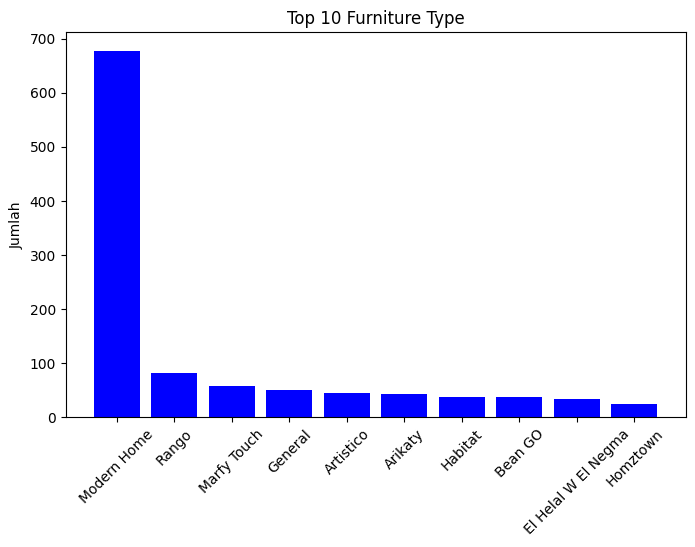

In [46]:
# Bar Chart (Matplotlib): 10 Jenis Furniture yang Paling Sering Digunakan
plt.figure(figsize=(8, 5))
plt.bar(top_types.index, top_types.values, color='blue')
plt.title("Top 10 Furniture Type")
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

<ipython-input-45-4968d93c0d50>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_types.index, y=top_types.values, palette='pastel')


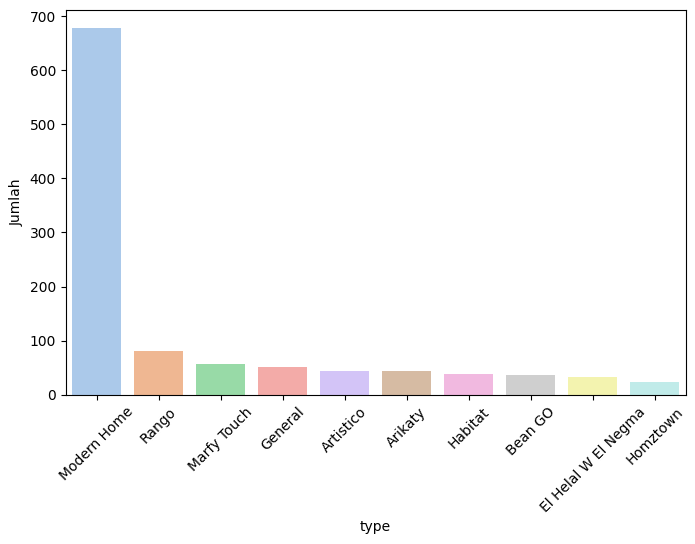

In [45]:
# Bar Chart (Seaborn)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_types.index, y=top_types.values, palette='pastel')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

# **Pie Chart**

Menunjukkan distribusi kategori harga (low, medium, high).

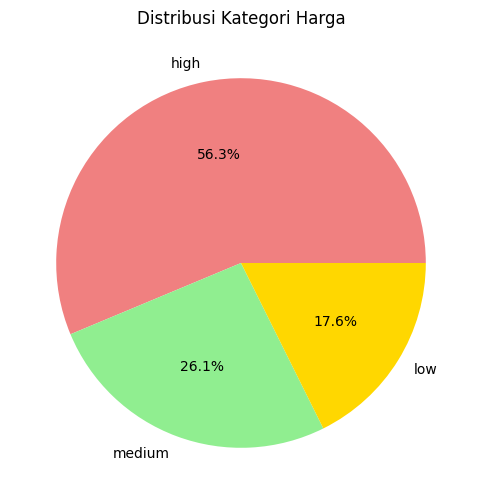

In [51]:
# Pie Chart (Matplotlib): Distribusi Kategori Harga
plt.figure(figsize=(6, 6))
plt.pie(df['price_category'].value_counts(), labels=df['price_category'].value_counts().index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'gold'])
plt.title('Distribusi Kategori Harga')
plt.show()

# **Histogram**

Menunjukkan distribusi harga produk, dengan kecenderungan harga yang lebih banyak berada di kisaran lebih rendah.

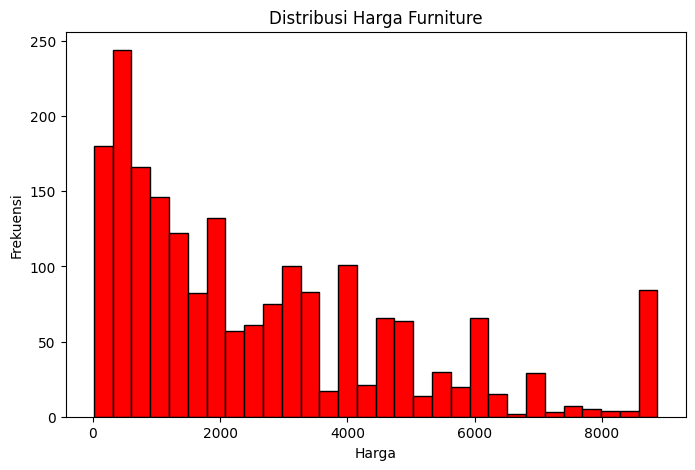

In [21]:
# Histogram (Matplotlib): Distribusi Harga
plt.figure(figsize=(8, 5))
plt.hist(df['price'], bins=30, color='red', edgecolor='black')
plt.title('Distribusi Harga Furniture')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

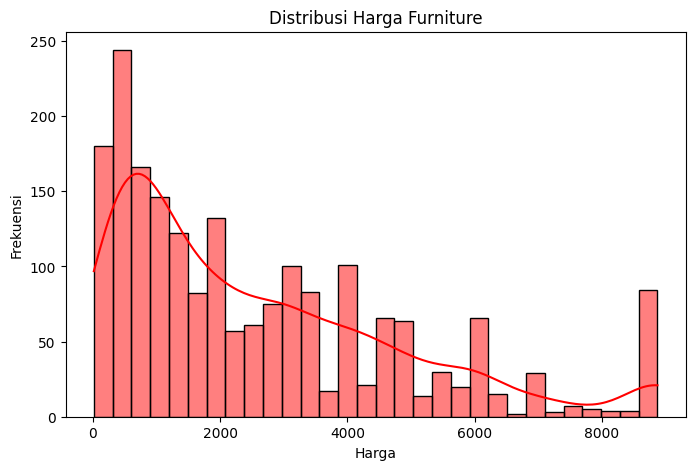

In [22]:
# Histogram (Seaborn)
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True, color='red')
plt.title('Distribusi Harga Furniture')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()